## Importando bibliotecas

In [2]:
#importando as bibliotecas
import yfinance as yf
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import numpy as np
import random
import plotly.graph_objs as go

from scipy.stats import norm, t

import vectorbt as vbt
from datetime import datetime

import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,8)
matplotlib.rcParams.update({'font.size': 22})

## Verificando estrutura do data frame

In [5]:
carteira_teorica = 'ibov'
#url = '/datasets/basedados/0_projetos/result/db_ct_ibov.csv'
url = f'../result/db_matriz_preco_ct_b3_{carteira_teorica}.csv'

In [6]:
df = pd.read_csv(url, index_col=0)

In [7]:
#verificando estrutura da tabela (linhas x colunas)
df.shape

(5680, 76)

In [8]:
#verificando nome das colunas
df.columns

Index(['alpa4.sa', 'abev3.sa', 'amer3.sa', 'b3sa3.sa', 'bpan4.sa', 'bbse3.sa',
       'brml3.sa', 'bbdc3.sa', 'bbdc4.sa', 'brap4.sa', 'bbas3.sa', 'brkm5.sa',
       'brfs3.sa', 'ccro3.sa', 'cmig4.sa', 'ciel3.sa', 'cogn3.sa', 'cple6.sa',
       'csan3.sa', 'cpfe3.sa', 'cvcb3.sa', 'cyre3.sa', 'dxco3.sa', 'ecor3.sa',
       'elet3.sa', 'elet6.sa', 'embr3.sa', 'enbr3.sa', 'engi11.sa', 'enev3.sa',
       'egie3.sa', 'eqtl3.sa', 'eztc3.sa', 'flry3.sa', 'ggbr4.sa', 'goau4.sa',
       'goll4.sa', 'hype3.sa', 'itsa4.sa', 'itub4.sa', 'jbss3.sa', 'jhsf3.sa',
       'klbn11.sa', 'rent3.sa', 'lren3.sa', 'mglu3.sa', 'mrfg3.sa', 'beef3.sa',
       'mrve3.sa', 'mult3.sa', 'pcar3.sa', 'petr3.sa', 'petr4.sa', 'prio3.sa',
       'posi3.sa', 'qual3.sa', 'radl3.sa', 'rail3.sa', 'sbsp3.sa', 'sanb11.sa',
       'csna3.sa', 'slce3.sa', 'sula11.sa', 'suzb3.sa', 'taee11.sa',
       'vivt3.sa', 'tims3.sa', 'tots3.sa', 'ugpa3.sa', 'usim5.sa', 'vale3.sa',
       'viia3.sa', 'wege3.sa', 'yduq3.sa', 'DATE_UPDATE', '

In [9]:
#excluindo colunas
df.drop(['DATE_UPDATE', 'CARTEIRA_TEORICA'], axis=1, inplace=True)

In [10]:
#confirmando as colunas excluidas
df.columns

Index(['alpa4.sa', 'abev3.sa', 'amer3.sa', 'b3sa3.sa', 'bpan4.sa', 'bbse3.sa',
       'brml3.sa', 'bbdc3.sa', 'bbdc4.sa', 'brap4.sa', 'bbas3.sa', 'brkm5.sa',
       'brfs3.sa', 'ccro3.sa', 'cmig4.sa', 'ciel3.sa', 'cogn3.sa', 'cple6.sa',
       'csan3.sa', 'cpfe3.sa', 'cvcb3.sa', 'cyre3.sa', 'dxco3.sa', 'ecor3.sa',
       'elet3.sa', 'elet6.sa', 'embr3.sa', 'enbr3.sa', 'engi11.sa', 'enev3.sa',
       'egie3.sa', 'eqtl3.sa', 'eztc3.sa', 'flry3.sa', 'ggbr4.sa', 'goau4.sa',
       'goll4.sa', 'hype3.sa', 'itsa4.sa', 'itub4.sa', 'jbss3.sa', 'jhsf3.sa',
       'klbn11.sa', 'rent3.sa', 'lren3.sa', 'mglu3.sa', 'mrfg3.sa', 'beef3.sa',
       'mrve3.sa', 'mult3.sa', 'pcar3.sa', 'petr3.sa', 'petr4.sa', 'prio3.sa',
       'posi3.sa', 'qual3.sa', 'radl3.sa', 'rail3.sa', 'sbsp3.sa', 'sanb11.sa',
       'csna3.sa', 'slce3.sa', 'sula11.sa', 'suzb3.sa', 'taee11.sa',
       'vivt3.sa', 'tims3.sa', 'tots3.sa', 'ugpa3.sa', 'usim5.sa', 'vale3.sa',
       'viia3.sa', 'wege3.sa', 'yduq3.sa'],
      dtype='ob

In [11]:
#verificando tipo do index
df.index

Index(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
       '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13', '2000-01-14',
       ...
       '2022-07-26', '2022-07-27', '2022-07-28', '2022-07-29', '2022-08-01',
       '2022-08-02', '2022-08-03', '2022-08-04', '2022-08-05', '2022-08-08'],
      dtype='object', name='date', length=5680)

In [12]:
#convertendo index para data
df.index = pd.to_datetime(df.index)

In [13]:
#confirmando tipo do index
df.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2022-07-26', '2022-07-27', '2022-07-28', '2022-07-29',
               '2022-08-01', '2022-08-02', '2022-08-03', '2022-08-04',
               '2022-08-05', '2022-08-08'],
              dtype='datetime64[ns]', name='date', length=5680, freq=None)

In [14]:
df

,alpa4.sa,abev3.sa,amer3.sa,b3sa3.sa,bpan4.sa,bbse3.sa,brml3.sa,bbdc3.sa,bbdc4.sa,brap4.sa,...,taee11.sa,vivt3.sa,tims3.sa,tots3.sa,ugpa3.sa,usim5.sa,vale3.sa,viia3.sa,wege3.sa,yduq3.sa
date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.196446,NaN,1.517180,...,NaN,7.796522,NaN,NaN,NaN,1.582737,1.795995,0.996683,0.124200,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.109432,NaN,1.408810,...,NaN,7.585367,NaN,NaN,NaN,1.525033,1.753233,0.996683,0.119841,NaN
2000-01-05,NaN,0.321626,NaN,NaN,NaN,NaN,NaN,1.147137,NaN,1.517180,...,NaN,7.669828,NaN,NaN,NaN,1.670117,1.753233,0.996683,0.119841,NaN
2000-01-06,NaN,0.305322,NaN,NaN,NaN,NaN,NaN,1.164540,NaN,1.517180,...,NaN,7.838754,NaN,NaN,NaN,1.821796,1.753233,0.996683,0.108946,NaN
2000-01-07,NaN,0.305322,NaN,NaN,NaN,NaN,NaN,1.184844,NaN,1.517180,...,NaN,7.877735,NaN,NaN,NaN,1.894338,1.817375,0.996683,0.108946,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-02,20.799999,14.710000,13.76,10.80,6.59,29.250000,8.02,14.640000,17.670000,22.450001,...,41.27,44.310001,12.29,26.314312,12.99,8.440000,70.250000,2.350000,28.379999,13.16
2022-08-03,21.290001,14.630000,14.74,11.16,6.79,28.559999,8.17,14.820000,17.950001,21.799999,...,41.27,44.599998,12.20,27.071558,13.46,8.440000,67.519997,2.620000,28.120001,14.28
2022-08-04,22.379999,14.680000,15.08,11.90,7.26,28.209999,8.65,15.180000,18.280001,22.110001,...,41.82,45.259998,12.50,27.500000,13.42,8.920000,67.129997,2.950000,28.809999,14.88


## Calculando o retorno mensal do ativo

In [15]:
#selecionando apenas uma acao
#calculando o retorno mensal
filter_asset = 'abev3.sa'
df_filter = df[filter_asset].resample('M', kind='period').last().pct_change().dropna().to_frame()

In [16]:
#verificando as últimas linhas dos df
df_filter.tail()

,abev3.sa
date,
2022-04,-0.057143
2022-05,-0.022727
2022-06,-0.055673
2022-07,0.114179
2022-08,-0.008707


In [17]:
#alterando nome de uma coluna especifica
df_filter.rename(columns = {filter_asset:'return'}, inplace = True)

In [18]:
df_filter

,return
date,
2000-02,-0.065850
2000-03,0.295825
2000-04,0.032605
2000-05,-0.031575
2000-06,0.249973
...,...
2022-04,-0.057143
2022-05,-0.022727
2022-06,-0.055673


In [19]:
#criando colinas month e year para obter os dados de mês e ano
df_filter['month'] = df_filter.index.month
df_filter['year'] = df_filter.index.year

In [20]:
df_filter

,return,month,year
date,,,
2000-02,-0.065850,2,2000
2000-03,0.295825,3,2000
2000-04,0.032605,4,2000
2000-05,-0.031575,5,2000
2000-06,0.249973,6,2000
...,...,...,...
2022-04,-0.057143,4,2022
2022-05,-0.022727,5,2022
2022-06,-0.055673,6,2022


In [21]:
#convertendo df para pivot com ano e mes
tab_retorno_mensal = df_filter.pivot(values='return', columns='month', index='year')

## Plotando gráfico do retorno mensal

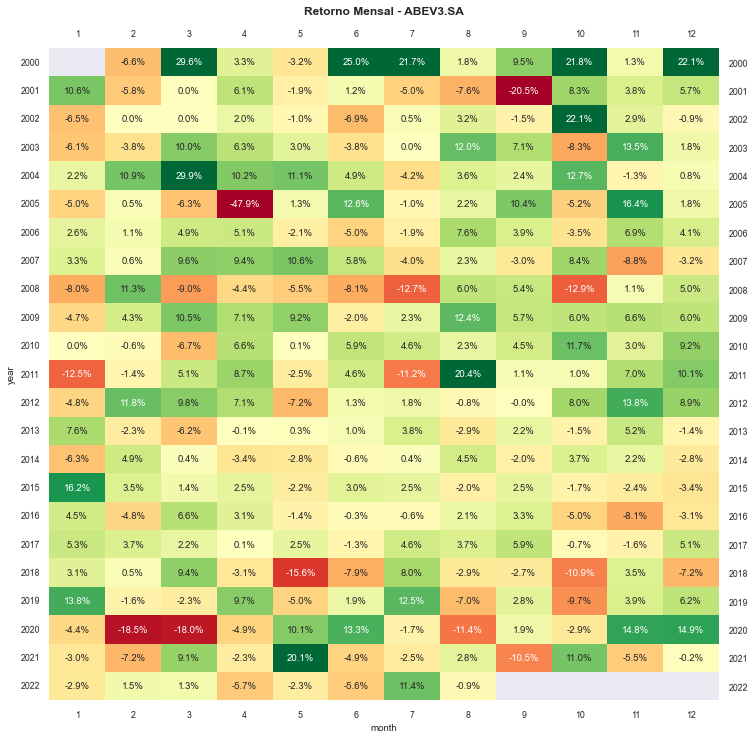

In [22]:
#visualizando grafico
plt.figure(figsize=(12,12))
sns.set(font_scale=0.8)

ax = sns.heatmap(tab_retorno_mensal, 
                 annot  = True, 
                 fmt    = ".1%", 
                 cmap   = "RdYlGn", 
                 vmin   = -0.2, 
                 vmax   = 0.2, 
                 center = 0, 
                 cbar=False)

ax.set_title(f'Retorno Mensal - {filter_asset.upper()}', pad=15, fontdict={'fontsize':12, 'fontweight':600})
ax.tick_params(axis = "y", labelright =True, labelrotation=.90)
ax.tick_params(axis = "x", labeltop=True)

## Calculando o retorno trimestral do ativo